In [49]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import math

In [61]:
path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\Data\very_spatial_norm"
brains = []
for file_name in os.listdir(path):
    if file_name.endswith('.nii.gz'):
        file_path = os.path.join(path, file_name)
        img = nib.load(file_path)
        data = img.get_fdata()
        brains.append(data)

        print(file_name[0:10], end="|")
        if len(brains) > 100:
            break

brains = np.array(brains)

100_sub-AD|101_sub-AD|102_sub-AD|103_sub-AD|104_sub-AD|105_sub-AD|106_sub-AD|107_sub-AD|108_sub-AD|109_sub-AD|110_sub-AD|111_sub-AD|112_sub-AD|113_sub-AD|114_sub-AD|115_sub-AD|116_sub-AD|117_sub-AD|118_sub-AD|119_sub-AD|11_sub-ADN|120_sub-AD|121_sub-AD|122_sub-AD|123_sub-AD|124_sub-AD|125_sub-AD|126_sub-AD|12_sub-ADN|14_sub-ADN|16_sub-ADN|17_sub-ADN|181_sub-AD|182_sub-AD|183_sub-AD|184_sub-AD|185_sub-AD|186_sub-AD|187_sub-AD|188_sub-AD|189_sub-AD|18_sub-ADN|190_sub-AD|191_sub-AD|192_sub-AD|193_sub-AD|194_sub-AD|195_sub-AD|198_sub-AD|199_sub-AD|19_sub-ADN|1_sub-ADNI|200_sub-AD|201_sub-AD|202_sub-AD|203_sub-AD|204_sub-AD|205_sub-AD|206_sub-AD|207_sub-AD|208_sub-AD|209_sub-AD|20_sub-ADN|210_sub-AD|211_sub-AD|212_sub-AD|213_sub-AD|216_sub-AD|218_sub-AD|219_sub-AD|21_sub-ADN|220_sub-AD|221_sub-AD|222_sub-AD|224_sub-AD|225_sub-AD|226_sub-AD|227_sub-AD|228_sub-AD|229_sub-AD|22_sub-ADN|230_sub-AD|231_sub-AD|232_sub-AD|233_sub-AD|234_sub-AD|235_sub-AD|236_sub-AD|237_sub-AD|238_sub-AD|239_sub-AD

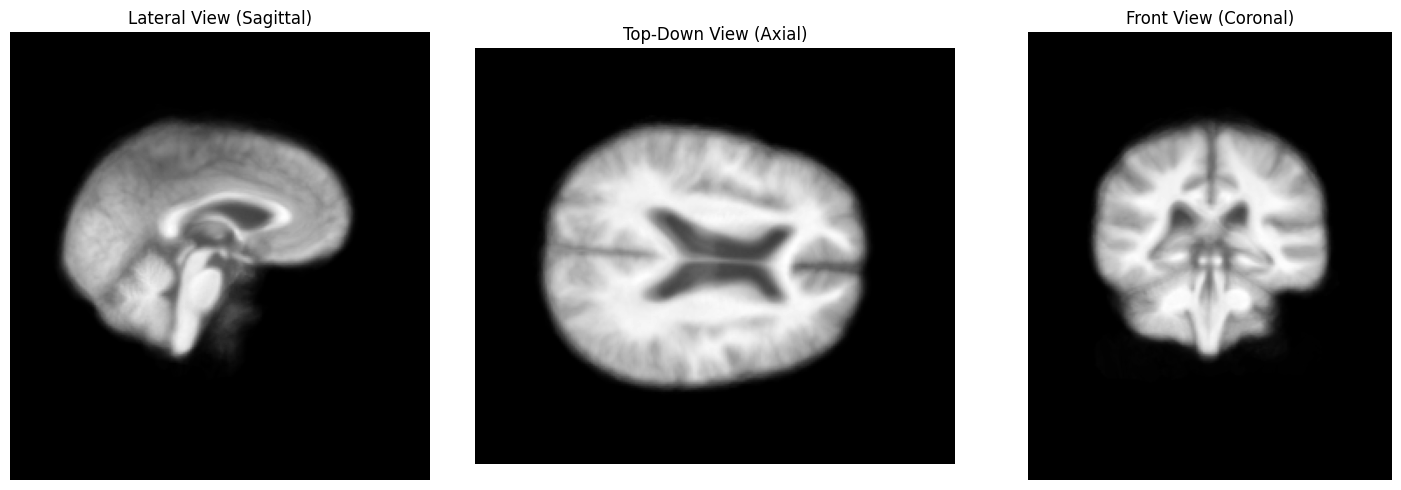

In [62]:
lateral_index = brains.shape[1] // 2
top_down_index = int(brains.shape[3] * 0.6)
front_index = int(brains.shape[2] * 0.4)

mean_lateral = np.mean(brains[:, lateral_index, :, :], axis=0)
mean_top_down = np.mean(brains[:, :, :, top_down_index], axis=0)
mean_front = np.mean(brains[:, :, front_index, :], axis=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mean_lateral.T, cmap='gray', origin="lower")
axes[0].set_title("Lateral View (Sagittal)")
axes[0].axis('off')

axes[1].imshow(mean_top_down, cmap='gray')
axes[1].set_title("Top-Down View (Axial)")
axes[1].axis('off')

axes[2].imshow(mean_front.T, cmap='gray', origin="lower")
axes[2].set_title("Front View (Coronal)")
axes[2].axis('off')

plt.tight_layout()
plt.show()


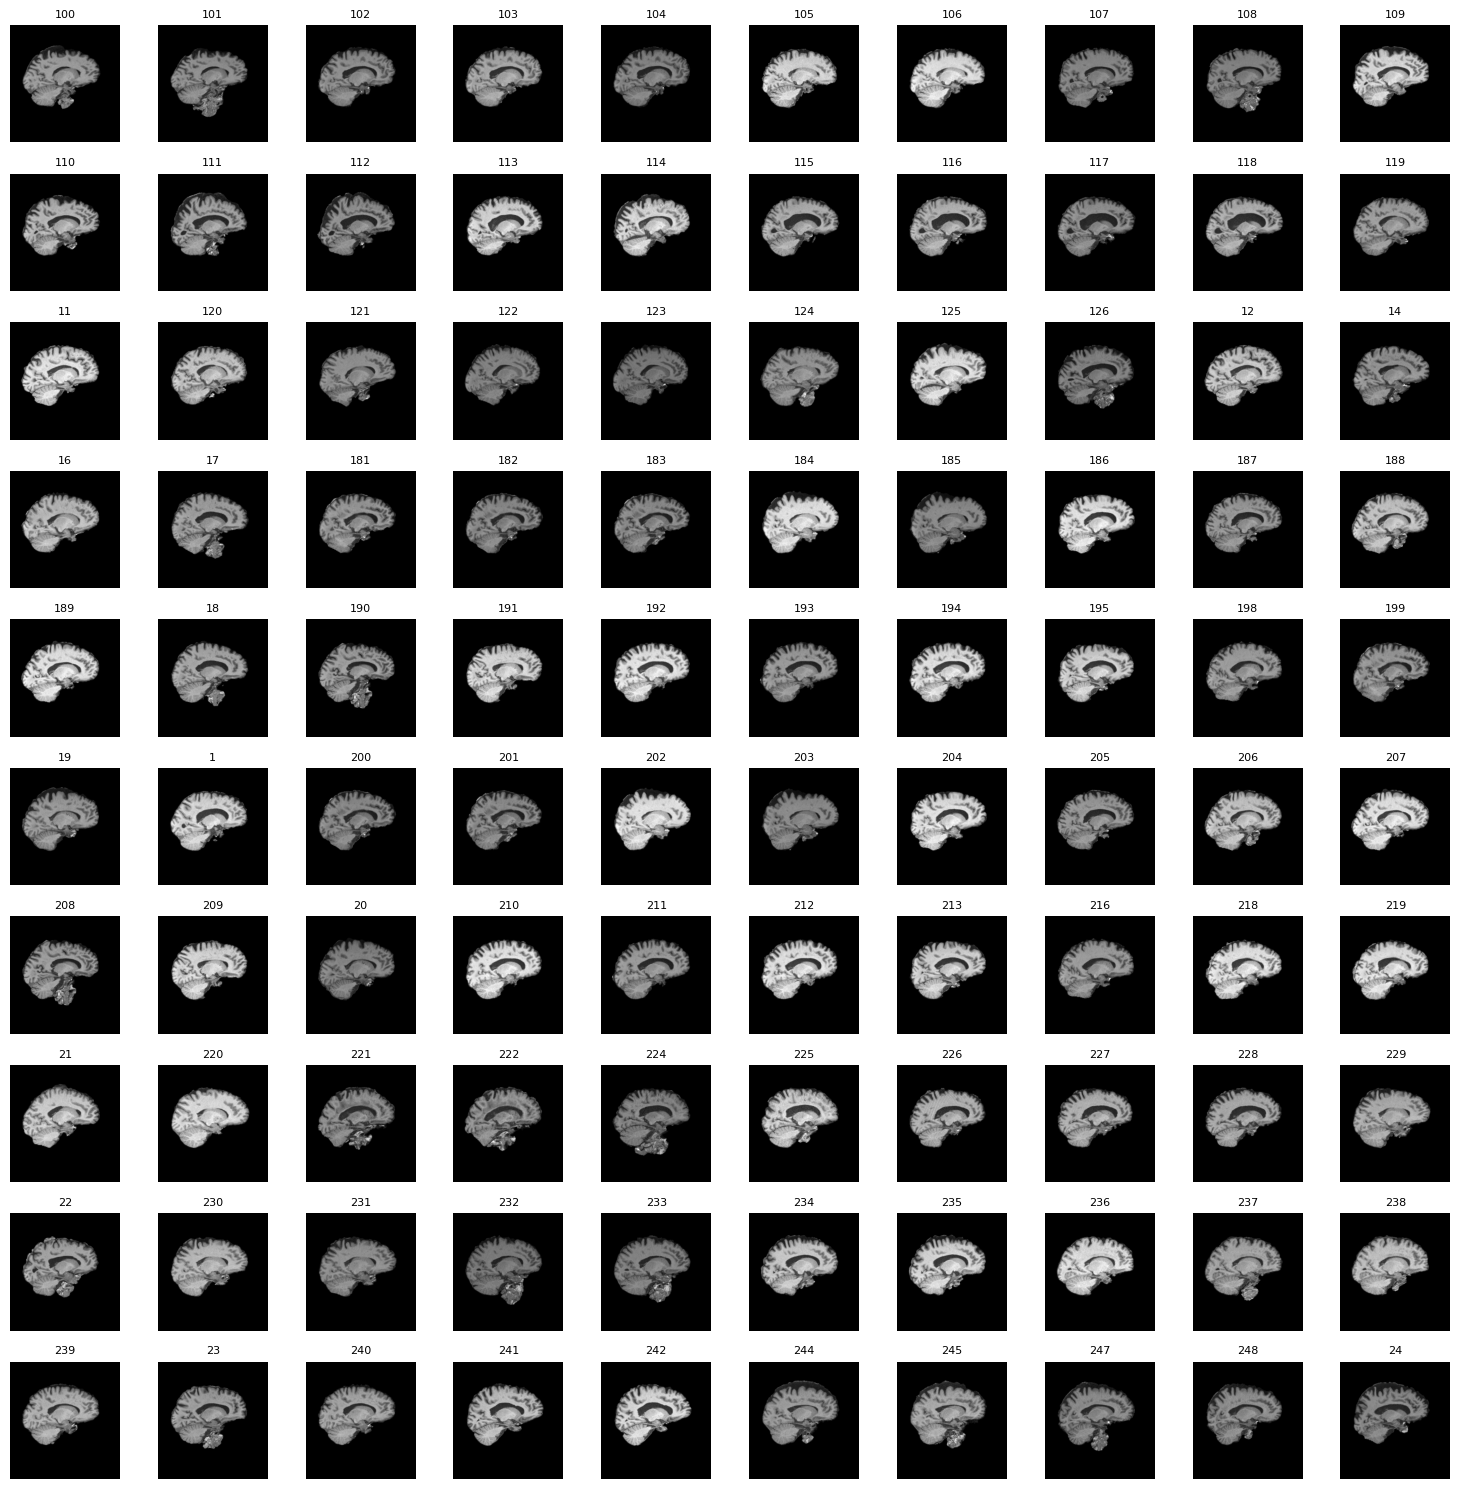

In [63]:
def plot_middle_slices_in_range_small_sample(all_file_paths, n1, n2, axis=1):
    # Get a sorted list of all files in the directory excluding mask files
    all_files = all_file_paths
    
    # Filter files between n1 and n2
    selected_files = all_files[n1:n2]
    num_images = len(selected_files)
    
    # Determine grid size for the plot
    cols = math.ceil(math.sqrt(num_images))  # Number of columns in the grid
    rows = math.ceil(num_images / cols)  # Number of rows in the grid
    
    # Create a figure for plotting
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    for i, file in enumerate(selected_files):
        file_path = os.path.join(folder_path, file)
        
        # Load the NIfTI file
        img = nib.load(file_path)
        img_data = img.get_fdata()
        
        # Calculate the middle index along axis 0
        middle_index = img_data.shape[axis] // 2
        
        # Plot the middle slice on the current axis
        axes[i].imshow(img_data[middle_index, :, :].T, cmap='gray', origin="lower")
        axes[i].set_title(file_path.split("\\")[-1].split("_")[0], fontsize=8)
        axes[i].axis('off')
    
    # Hide unused axes if the grid is larger than the number of images
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

folder_path = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\Data\very_spatial_norm"
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.nii.gz')])
plot_middle_slices_in_range_small_sample(all_files, 0, 100, axis=1)